In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/2023년_카이스트_금융시계열/1주차실습/1. 금융시계열 실습')

In [ ]:
# AR 모형을 임의로 생성하고, 향후 데이터를 예측한다.

In [4]:
import warnings
warnings.filterwarnings('ignore')
# -----------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from MyUtil.MyTimeSeries import sampleARIMA
from statsmodels.tsa.arima.model import ARIMA

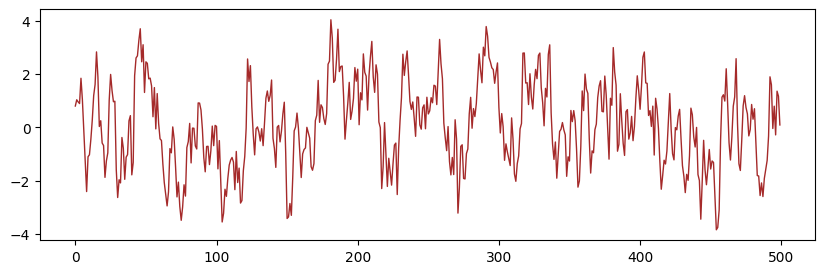

In [5]:
# AR(1) 샘플을 생성한다
y = sampleARIMA(ar=[0.8], d=0, ma=[0], n=500)
plt.figure(figsize=(10, 3))
plt.plot(y, color='brown', linewidth=1)
plt.show()

In [6]:
# 샘플링 데이터를 AR(1) 모형으로 분석한다 (Fitting)
model = ARIMA(y, order=(1,0,0))
model_fit = model.fit()

In [7]:
# 두 배열을 오른쪽 왼쪽으로 붙이기
#    : np.r_[a, b]
#    : np.hstack([a, b])
#    : np.concatenate((a, b), axis = 0)

In [8]:
# 향후 10 기간 데이터를 예측한다
forecast = model_fit.forecast(steps=10)[0]
forecast = np.r_[y[-1], forecast]  # y의 마지막 값을 forecast 앞 부분에 넣는다

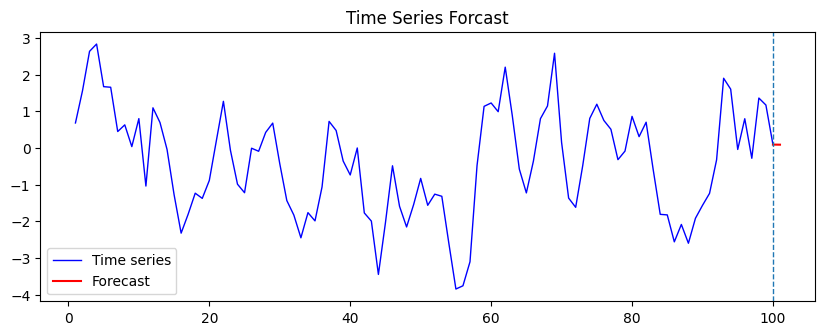

In [9]:
# 원 시계열과 예측된 시계열을 그린다
ytail = y[len(y)-100:]   # 뒷 부분 100개만 그린다
ax1 = np.arange(1, len(ytail) + 1)
ax2 = np.arange(len(ytail), len(ytail) + len(forecast))
plt.figure(figsize=(10, 3.5))
plt.plot(ax1, ytail, color='blue', label='Time series', linewidth=1)
plt.plot(ax2, forecast, color='red', label='Forecast')
plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)
plt.title("Time Series Forcast")
plt.legend()
plt.show()